In [17]:
#Load the Data
import pandas as pd   # Import pandas to handle data as DataFrames and read csv files
import numpy as np # Import numpy for numerical operations like mean and median
train = pd.read_csv("train.csv") # Load training data (includes Survived column for model training)

test = pd.read_csv("test.csv") # Load testing data (no Survived column, used for final predictions)


train.head() # Show the first 5 rows of the training dataset




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
 #Exploratory Data Analysis
print("Train shape:", train.shape) # Print number of rows and columns in train and test datasets

print("Test shape:", test.shape)

train.info() # Display column types and non-null counts in training data

print("\n", "-"*40, "\n")
print(train.describe()) # Show basic statistics for numerical features in the training data


Train shape: (891, 12)
Test shape: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 ---------------------------------------- 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.00

In [19]:
# Show number and percentage of missing values in each column
print("Null values (count):\n", train.isnull().sum())
print("\nNull values (%):\n", ((train.isnull().sum() / len(train)) * 100).round(2))


Null values (count):
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values (%):
 PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


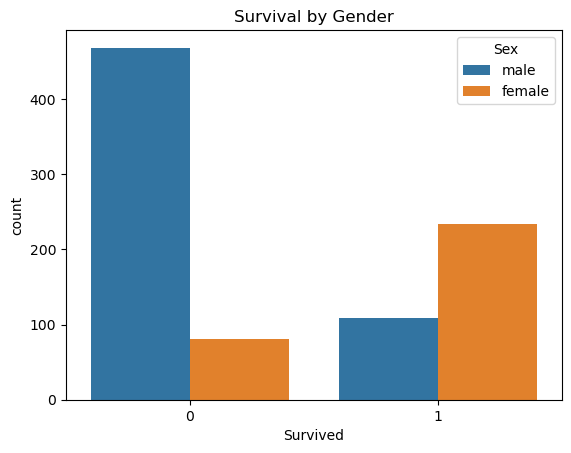

In [20]:
#Visualization (Survival by Gender)
import seaborn as sns # Import seaborn for better visualizations
import matplotlib.pyplot as plt # Import matplotlib for diagram
sns.countplot(x="Survived", hue="Sex", data=train) # Draw a count plot of survived vs not survived, split by gender
plt.title("Survival by Gender") # Add title to the plot
plt.show() # Show the plot



In [21]:
train.isnull().sum() # Count the number of missing (null) values in each column



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
print(train.columns) # Print all column names in the training dataset





Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [23]:

#Preprocessing
train["Age"] = train["Age"].fillna(train["Age"].mean())# Fill missing Age values in training set with the mean age

test["Age"] = test["Age"].fillna(test["Age"].mean())# Fill missing Age values in test set with the mean age


test["Fare"] = test["Fare"].fillna(test["Fare"].median())# Fill missing Fare values in test set with the median fare


train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])# Fill missing Embarked values in training set with the most common port

test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])# Fill missing Embarked values in test set with the most common port



In [24]:
print("Train nulls:\n", train.isnull().sum())
print("\nTest nulls:\n", test.isnull().sum())


Train nulls:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Test nulls:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Preprocessing
train.drop("Cabin", axis=1, inplace=True)# Drop the 'Cabin' column from train and test datasets (too many missing values)

test.drop("Cabin", axis=1, inplace=True)


In [26]:
print(train.isnull().sum())
print(test.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
# Preprocessing
test_passenger_ids = test["PassengerId"] # Save PassengerId from test set to use in final submission

train.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)# Drop irrelevant columns from training data: PassengerId, Name, Ticket

test.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)# Drop the same columns from test set to match training data




In [28]:
# Preprocessing
# One-Hot Encoding
train = pd.get_dummies(train, columns=["Sex", "Embarked"])# Convert categorical columns (Sex, Embarked) into numeric dummy variables in training set

test = pd.get_dummies(test, columns=["Sex", "Embarked"])# Apply the same encoding to test set to match training structure



In [29]:
# preprocessing
X = train.drop("Survived", axis=1)# Remove target column 'Survived' from training data to get features X

test = test.reindex(columns=train.drop("Survived", axis=1).columns, fill_value=0)
# Match test columns to training features (excluding Survived), add missing columns with value 0


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split to divide data into training and validation sets

y = train["Survived"] # Save target column 'Survived' as y
 #Modeling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into 80% training and 20% validation sets



In [ ]:
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # Import accuracy_score to evaluate model performance


model = LogisticRegression(max_iter=1000)# Create Logistic Regression model instance

model.fit(X_train, y_train)# Train model on training data


y_pred = model.predict(X_val)# Predict outcomes on validation data

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))# Print the model accuracy on validation set



Logistic Regression Accuracy: 0.8100558659217877


In [ ]:
#modeling
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()# Create instance of Decision Tree model with default settings

tree_model.fit(X_train, y_train)# Train the Decision Tree model on training data


tree_preds = tree_model.predict(X_val)# Predict outcomes on validation set using the tree model

print("Decision Tree Accuracy:", accuracy_score(y_val, tree_preds))# Print model accuracy for Decision Tree on validation data



Decision Tree Accuracy: 0.7821229050279329


In [ ]:
#model optimization
tuned_tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)# Create a Decision Tree model with limited depth to reduce overfitting

tuned_tree_model.fit(X_train, y_train)# Train the tuned Decision Tree model

tuned_tree_preds = tuned_tree_model.predict(X_val)# Predict using the tuned Decision Tree

print("Tuned Decision Tree Accuracy:", accuracy_score(y_val, tuned_tree_preds))# Print accuracy of the tuned Decision Tree on validation data



Tuned Decision Tree Accuracy: 0.7988826815642458


In [ ]:

best_model = model  # Choose the best model (Logistic Regression) to make final predictions


final_preds = best_model.predict(test)# Predict survival on the test dataset


submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": final_preds
})# Create a DataFrame for submission with PassengerId and predicted Survived values


submission.to_csv("submission.csv", index=False)# Export the submission file as CSV without row index

